In [5]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

df = pd.read_csv(r"overall_post_2.csv",sep=',',header=0,infer_datetime_format = True, parse_dates = ['date_month'])

#df = pd.read_csv(r"C:\Users\zzhu\Dropbox\overall_post_2.csv",sep=',',header=0,infer_datetime_format = True, parse_dates = ['date_month'])


In [6]:
df = df.rename(columns = {"Market":"City"})

In [7]:
df.columns

Index(['shareid_str', 'Year Month', 'Supply', 'Demand', 'Revenue', 'Occ',
       'ADR', 'RevPAR', 'date_month', 'year', 'month', 'days_in_month',
       'supply_rooms', 'size', 'ln_revenue', 'ln_revpar', 'ln_adr', 'Country',
       'City', 'Chain', 'Owner', 'Mgmt', 'ParentCompany', 'Operation', 'Scale',
       'Class', 'Location', 'OpenDate', 'SizeCode', 'review_month',
       'service_mean', 'service_count', 'cleanliness_count',
       'cleanliness_mean', 'monthly_hotel_response', 'partnerships',
       'value_count', 'value_mean', 'location_count', 'location_mean',
       'renovate', 'monthly_reviews', 'negatives1', 'negatives2',
       'month_rating_mean', 'solo', 'couple', 'business', 'family',
       'roomsQuality_count', 'roomsQuality_mean', 'sleepQuality_mean',
       'sleepQuality_count', 'shareid', 'accum_rating', 'num_of_reviews',
       'num_of_responses', 'num_of_partnerships', 'num_of_solo',
       'num_of_couple', 'num_of_family', 'num_of_business',
       'first_review_d

In [8]:
df = df.drop(["renovate","no_list_ta"], axis = 1)
df = df[df["City"]!='Nashville, TN']
df["shareid_str"].nunique() # 607
len(df) # Total number of observations: 86300


86300

In [9]:
df["first_review_date"]= pd.to_datetime(df["first_review_date"])
df["on_ta"] = df["date_month"]>= df["first_review_date"]

#### NaN first_review_date means the hotel does not have list on TA
#df[df["first_review_date"].isna()==True]["on_ta"]

In [10]:
print('The number of observations that actually have reviews:{}'.format(len(df[df["date_month"]>= df["first_review_date"]])))
print('The number of observations that are on TA:{}'.format(len(df[df["on_ta"]==1])))


df_on_ta = df[df["on_ta"]==1]

The number of observations that actually have reviews:56483
The number of observations that are on TA:56483


Construct quality ladder:
    - 0: not on TripAdvisor/no review (29717 obs)
    - 1: less or equal to 3 bubbles (10833 obs)
    - 2: 3.5 bubbles (12313 obs)
    - 3: 4 bubbles (18951 obs)
    - 4: 4.5 and 5 bubbles (14500 obs)

In [11]:
#### Create quality variable


def quality_var(df, a, b):
    df[a] = 0
    mask = (df[b] > 0) & (df[b] < 3.25)
    df.loc[mask, a] = 1
    mask = (df[b] >=3.25) & (df[b] < 3.75)
    df.loc[mask, a] = 2
    mask = (df[b] >=3.75) & (df[b] < 4.25)
    df.loc[mask, a] = 3
    mask = (df[b] >=4.25) 
    df.loc[mask, a] = 4
    return df

df= quality_var(df,'quality','accum_rating')
#len(df[df["quality"]!=0])
#df["quality"] = 0
#mask = (df.accum_rating >=3.75) & (df.accum_rating < 4.25)



In [65]:
def quality_var(df, a, b):
    df[a] = 0
    mask = (df[b] > 0) & (df[b] < 3.25)
    df.loc[mask, a] = 1
    mask = (df[b] >=3.25) & (df[b] < 4.25)
    df.loc[mask, a] = 2
    mask = (df[b] >=4.25) 
    df.loc[mask, a] = 3
    return df

df= quality_var(df,'quality','accum_rating')

In [34]:

#df = df.dropna(subset=['Year Month'])
#df.groupby('Year Month')["quality"].count()

#fig = plt.figure(figsize = (500,400))
#quality = df.groupby(['Year Month','quality'])["shareid_str"].nunique()
#plot_quality = quality.unstack('quality')
#plot_quality.plot()
#plt.xticks(np.arange(200000,201800,60), rotation = 75)
#df['quality'].hist(by=df['year'])
#plt.subplots_adjust(wspace=3, hspace=5)
#plot_df = quality.unstack('quality').loc[:,]

#plot_df = apple_fplot.unstack('Fungicide').loc[:, 'Value']
#plot_df.index = pd.PeriodIndex(plot_df.index.tolist(), freq='A')

In [57]:
df['quarter'] = df['date_month'].dt.to_period("Q")
df["quarter"]

0       2015Q1
1       2015Q1
2       2015Q1
3       2015Q2
4       2015Q2
5       2015Q2
6       2015Q3
7       2015Q3
8       2015Q3
9       2015Q4
10      2015Q4
11      2015Q4
12      2016Q1
13      2016Q1
14      2016Q1
15      2016Q2
16      2016Q2
17      2016Q2
18      2016Q3
19      2016Q3
20      2016Q3
21      2016Q4
22      2016Q4
23      2016Q4
24      2017Q1
25      2017Q1
26      2017Q1
27      2017Q2
28      2017Q2
29      2017Q2
         ...  
86284   2005Q1
86285   2005Q1
86286   2005Q1
86287   2005Q2
86288   2005Q2
86289   2005Q2
86290   2005Q3
86291   2005Q3
86292   2005Q3
86293   2005Q4
86294   2005Q4
86295   2005Q4
86296   2006Q1
86297   2006Q1
86298   2006Q1
86299   2006Q2
86300   2006Q2
86301   2006Q2
86302   2006Q3
86303   2006Q3
86304   2006Q3
86305   2006Q4
86306   2006Q4
86307   2006Q4
86308   2007Q1
86309   2007Q1
86310   2007Q1
86311   2007Q2
86312   2017Q4
86313   2017Q4
Name: quarter, Length: 86300, dtype: object

In [12]:
print(sum(df["quality"]==1))
print(sum(df["quality"]==2))
print(sum(df["quality"]==3))
print(sum(df["quality"]==4))
print(sum(df["quality"]==0))

df["penetration"] = df["monthly_reviews"]*2/df["Demand"]

#df_on_ta[df_on_ta["quality"]==0]["monthly_reviews"]

10833
12313
18951
14489
29714


In [13]:
#### Construct 3 month moving average review rating

df["ma_3m_rating"] = df.groupby('shareid_str')['month_rating_mean'].rolling(3).mean().reset_index(0,drop=True)
df = quality_var(df,'3m_quality','ma_3m_rating')
df = quality_var(df,'location_quality','location_mean')


In [14]:
print(len(df[df["on_ta"]==0]))
print(len(df[df["quality"]==0]))
#### why they are not equal?
df[(df["quality"]==0)&(df["on_ta"]!=0)]
df["on_ta_quality"] = df["quality"]==0

29817
29714


In [15]:
sum(df["on_ta_quality"])

29714

In [16]:
stats_3m_rating = df.groupby("shareid_str")["ma_3m_rating"].describe()

#### number of observations for each property
stats_3m_rating["count"].describe()

count    607.000000
mean     140.174629
std       74.729473
min        0.000000
25%       73.000000
50%      169.000000
75%      213.000000
max      213.000000
Name: count, dtype: float64

In [17]:
print(df[df["year"]==2015]["penetration"].mean())
print(df[df["year"]==2016]["penetration"].mean())
print(df[df["year"]==2017]["penetration"].mean())
print(df[df["year"]==2015]["Demand"].mean())
print(df[df["year"]==2016]["Demand"].mean())
print(df[df["year"]==2017]["Demand"].mean())

0.00750539718261032
0.008297433611686436
0.007142467628999357
4312.16515690715
4085.261302681992
4186.342582014036


In [18]:
df.to_csv("data_0922.csv",index=False)

## Overall quality change over time

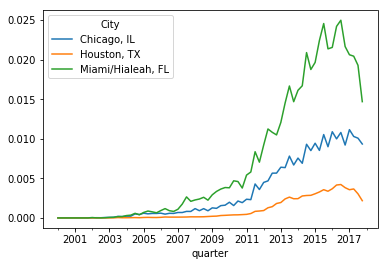

<Figure size 432x288 with 0 Axes>

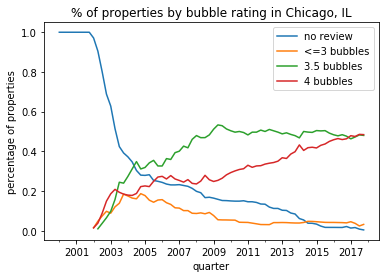

<Figure size 432x288 with 0 Axes>

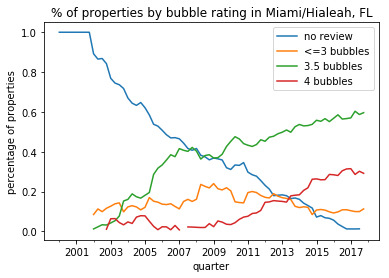

<Figure size 432x288 with 0 Axes>

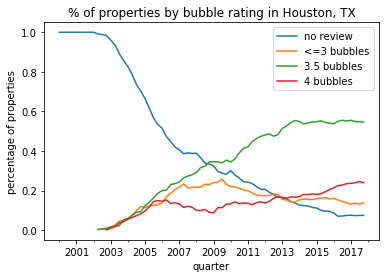

In [70]:
#df = df[df["date_month"]>df["first_review"]]
#df = df[df["quality"]!=0]
df['quarter'] = df['date_month'].dt.to_period("Q")
df['quarter_2'] = df['date_month'].dt.to_period("2Q")

import matplotlib.pyplot as plt
#df.groupby(["City","date_month"])["quality"].mean().unstack().T.plot()
df.groupby(["City","quarter"])["penetration"].mean().unstack().T.plot()

chicago = df[df["City"].str.contains("Chicago")]
miami = df[df["City"].str.contains("Miami")]
houston = df[df["City"].str.contains("Houston")]

city_list = [chicago,miami,houston]



for city in city_list:
    temp = city.groupby(["quarter","quality"])["shareid_str"].count().unstack()
    plt.figure()
    temp[[0,1,2,3]].div(temp.fillna(0).sum(axis=1), axis=0).plot()
    plt.legend(['no review','<=3 bubbles', '3.5 bubbles', '4 bubbles', '>=4.5 bubbles'])
    plt.title("% of properties by bubble rating in {}".format(city["City"].iloc[0]))
    plt.ylabel("percentage of properties")
    
    



<Figure size 432x288 with 0 Axes>

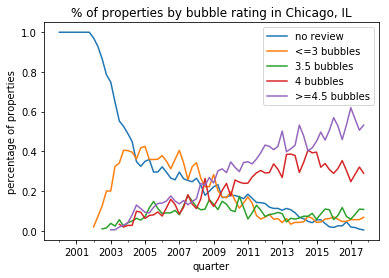

<Figure size 432x288 with 0 Axes>

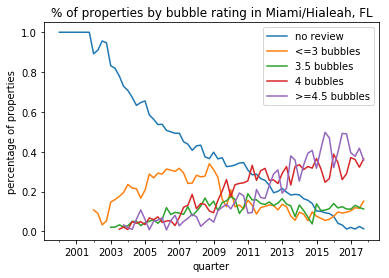

<Figure size 432x288 with 0 Axes>

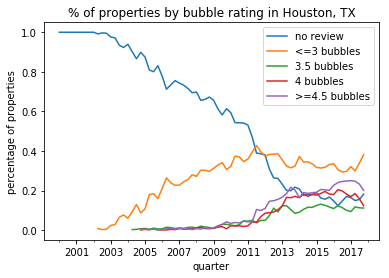

In [45]:
for city in city_list:
    temp = city.groupby(["quarter","3m_quality"])["shareid_str"].count().unstack()
    plt.figure()
    temp[[0,1,2,3,4]].div(temp.fillna(0).sum(axis=1), axis=0).plot()
    plt.legend(['no review','<=3 bubbles', '3.5 bubbles', '4 bubbles', '>=4.5 bubbles'])
    plt.title("% of properties by bubble rating in {}".format(city["City"].iloc[0]))
    plt.ylabel("percentage of properties")

In [72]:
df[columns].to_csv("/users/juju/downloads/data_520.csv",index = False)


In [71]:
columns = ["accum_rating","shareid_str","Demand","ADR","date_month","year","month","size","ln_adr","City","Chain","Owner","Mgmt", "ParentCompany","Operation","Scale","Class", "Location", "OpenDate",'num_of_reviews',"SizeCode", "on_ta","class_group","quality","penetration", "3m_quality"]

## Quality Adjustment Among Properties who HAVE reviews

<Figure size 432x288 with 0 Axes>

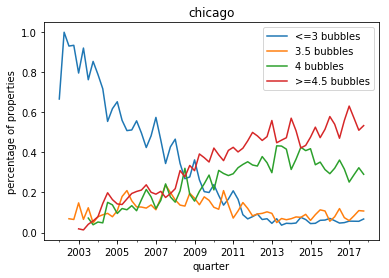

<Figure size 432x288 with 0 Axes>

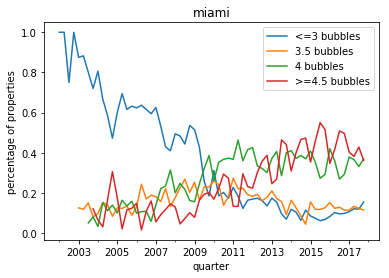

<Figure size 432x288 with 0 Axes>

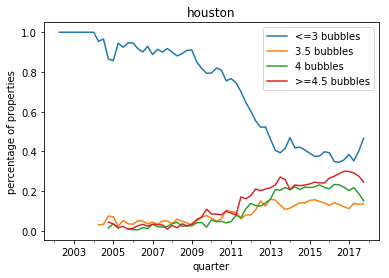

In [61]:

#df.groupby(["Market","date_month"])["3m_quality"].mean().unstack().T.plot()

chicago = df[df["Market"].str.contains("Chicago")]
miami = df[df["Market"].str.contains("Miami")]
houston = df[df["Market"].str.contains("Houston")]


city_list = [chicago,miami,houston]

for city in city_list:
    temp = city.groupby(["quarter","3m_quality"])["shareid_str"].count().unstack().drop([0],axis=1)
    plt.figure()
    temp[[1,2,3,4]].div(temp.fillna(0).sum(axis=1), axis=0).plot()
    
    plt.legend(['<=3 bubbles', '3.5 bubbles', '4 bubbles', '>=4.5 bubbles'])
    plt.title(get_df_name(city))
    plt.ylabel("percentage of properties")

    

### location quality

<Figure size 432x288 with 0 Axes>

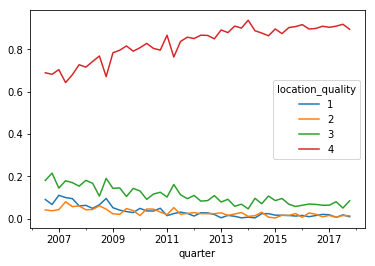

<Figure size 432x288 with 0 Axes>

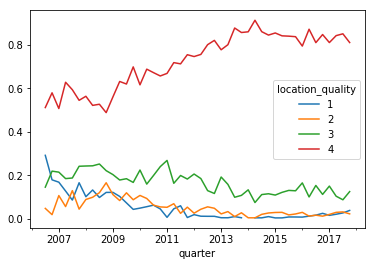

<Figure size 432x288 with 0 Axes>

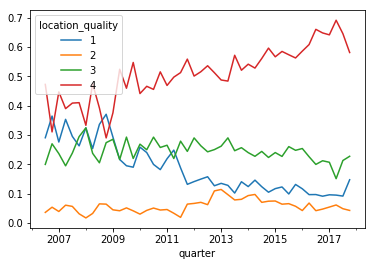

In [89]:
df = quality_var(df,'location_quality','location_mean')
chicago = df[df["Market"].str.contains("Chicago")]
miami = df[df["Market"].str.contains("Miami")]
houston = df[df["Market"].str.contains("Houston")]

city_list = [chicago,miami,houston]

for city in city_list:
    temp = city.groupby(["quarter","location_quality"])["shareid_str"].count().unstack().drop([0],axis=1)
    plt.figure()
    temp[[1,2,3,4]].div(temp.fillna(0).sum(axis=1), axis=0).plot()
    
    


### Other Quality Categories 

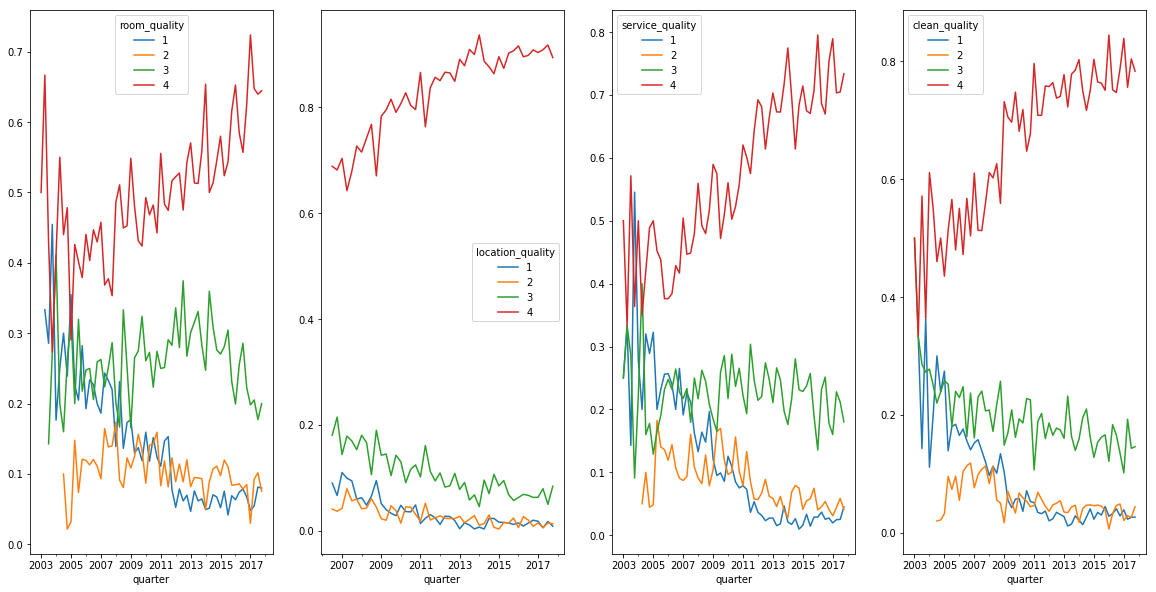

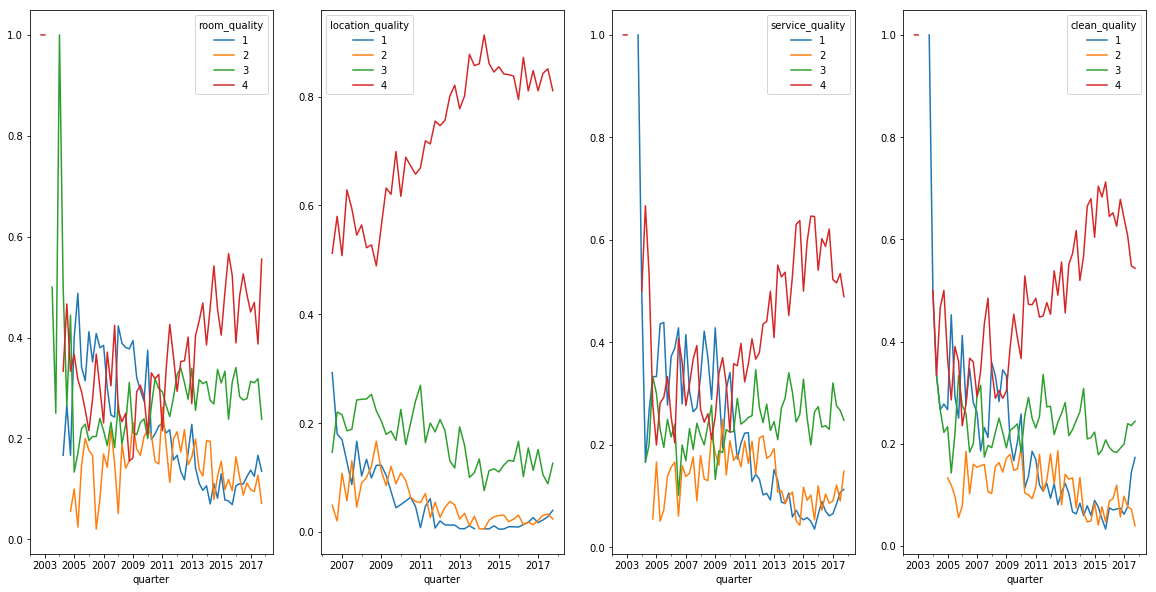

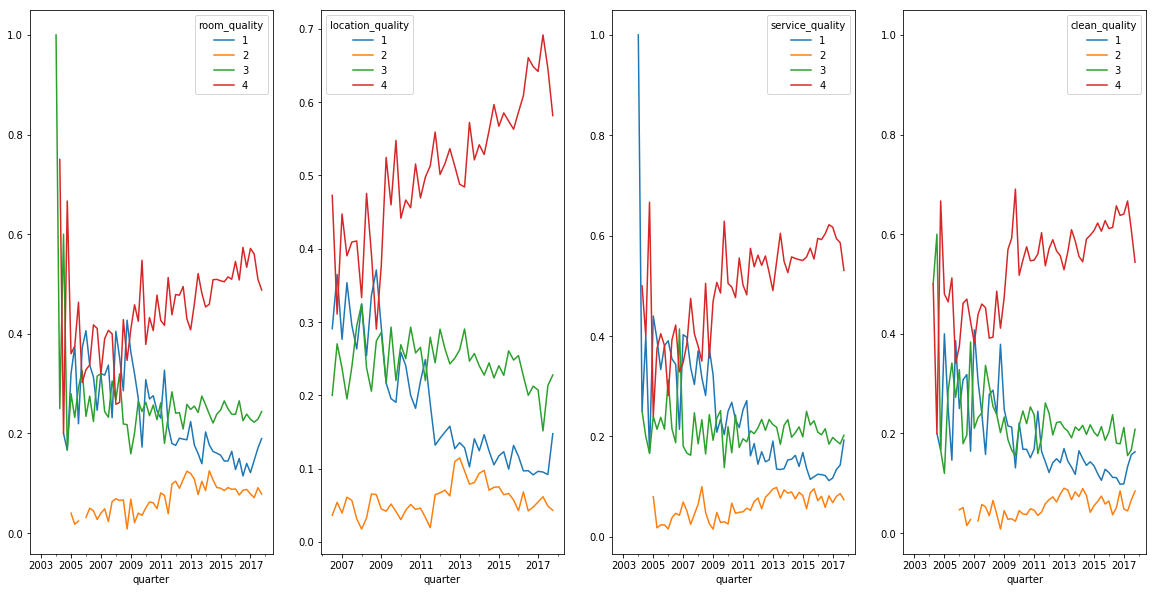

In [104]:
df = quality_var(df,'service_quality','service_mean')
df = quality_var(df,'sleep_quality','sleepQuality_mean')
df = quality_var(df,'room_quality','roomsQuality_mean')
df = quality_var(df,'value_quality','value_mean')
df = quality_var(df,'clean_quality','cleanliness_mean')


chicago = df[df["Market"].str.contains("Chicago")]
miami = df[df["Market"].str.contains("Miami")]
houston = df[df["Market"].str.contains("Houston")]

city_list = [chicago,miami,houston]

for city in city_list:
    
    fig, ax = plt.subplots(ncols=4, figsize=(20,10))
    
    temp1 = city.groupby(["quarter","room_quality"])["shareid_str"].count().unstack().drop([0],axis=1)

    temp1[[1,2,3,4]].div(temp1.fillna(0).sum(axis=1), axis=0).plot(ax = ax[0])
    
    
    
   
    temp2 = city.groupby(["quarter","location_quality"])["shareid_str"].count().unstack().drop([0],axis=1)
    
    temp2[[1,2,3,4]].div(temp2.fillna(0).sum(axis=1), axis=0).plot(ax = ax[1])
   
#for city in city_list:
    
    #fig, ax = plt.subplots(ncols=2, figsize=(12,6))
    
    temp1 = city.groupby(["quarter","service_quality"])["shareid_str"].count().unstack().drop([0],axis=1)

    temp1[[1,2,3,4]].div(temp1.fillna(0).sum(axis=1), axis=0).plot(ax = ax[2])
    
    
   
    temp2 = city.groupby(["quarter","clean_quality"])["shareid_str"].count().unstack().drop([0],axis=1)
    
    temp2[[1,2,3,4]].div(temp2.fillna(0).sum(axis=1), axis=0).plot(ax = ax[3])
   

    
    
    
### CHANGE THE LEGENDS

In [185]:
import matplotlib.pyplot as plt
df = df[df["date_month"]>df["first_review"]]
df["3m_diff"] = df.groupby(["shareid_str"])["3m_quality"].diff(periods = 3)
df["quality_diff"] = df.groupby(["shareid_str"])["quality"].diff(periods = 3)



In [186]:
print(df[df["3m_diff"]>0]["shareid_str"].nunique())
print(df[df["3m_diff"]<0]["shareid_str"].nunique())
print(df[df["3m_diff"]==0]["shareid_str"].nunique())
print(df[df["quality_diff"]>0]["shareid_str"].nunique())
print(df[df["quality_diff"]<0]["shareid_str"].nunique())
print(df[df["quality_diff"]==0]["shareid_str"].nunique())
#df.groupby("date_month")["3m_diff"].mean()
#df.groupby(["Market","date_month"])["3m_diff"].mean().unstack().T.plot()

527
517
556
364
342
556


- Number of properties have both quality increase and decrease: 305
- Number of properties have quality decrease more than one ladder: 70
- Number of properties have quality increase more than one ladder: 20

In [191]:
quality_decrease = df[df["quality_diff"]<0]["shareid_str"].unique().tolist()
quality_increase = df[df["quality_diff"]>0]["shareid_str"].unique().tolist()
#### number of properties have both quality increase and decrease
print(len(list(set(quality_decrease) & set(quality_increase))))
#df[df["shareid_str"].isin(list(set(quality_decrease) & set(quality_increase)))]
df.set_index('date_month').groupby('shareid_str').resample('Q')['month_rating_mean', 'accum_rating'].mean()


#quality_decrease = df[df["quality_diff"]<-1]["shareid_str"].unique().tolist()
#quality_increase = df[df["quality_diff"]>1]["shareid_str"].unique().tolist()
#### number of properties have both quality increase and decrease
#### number of properties have both quality increase and decrease
#len(list(set(quality_decrease)))
#len(list(set(quality_decrease) & set(quality_increase)))
#len(list(set(quality_increase)))

#quality_increase = df[df["quality_diff"]>0]["shareid_str"].unique().tolist()
#sum(quality_increase.isin(quality_decrease))

302


month_rating_mean  accum_rating
shareid_str date_month                                 
75909       2016-09-30           4.842105      4.842105
            2016-12-31           4.805495      4.836579
            2017-03-31           4.750050      4.806099
            2017-06-30           4.756376      4.784918
            2017-09-30           4.890000      4.799998
80022       2013-12-31           0.000000      3.000000
            2014-03-31           0.000000      3.000000
            2014-06-30           1.000000      3.000000
            2014-09-30           0.000000      3.000000
            2014-12-31           0.000000      3.000000
            2015-03-31           0.000000      3.000000
            2015-06-30           0.000000      3.000000
            2015-09-30           0.000000      3.000000
            2015-12-31           1.333333      3.333333
            2016-03-31           0.000000      3.333333
            2016-06-30           0.000000      3.333333
            2016-09-30           0.000000      3.333333
            2016-12-31           0.000000      3.333333
            2017-03-31           0.000000      3.333333
            2017-06-30           0.000000      3.333333
            2017-09-30           1.000000      2.750000
80055       2010-12-31           2.500000      3.500000
            2011-03-31           0.000000      3.500000
            2011-06-30           1.666667      3.666667
            2011-09-30           1.666667      4.250000
            2011-12-31           1.500000      3.655556
            2012-03-31           2.666667      3.661706
            2012-06-30           4.333333      3.811953
            2012-09-30           4.000000      3.909799
            2012-12-31           1.666667      3.792758
...                                   ...           ...
10167128    2010-09-30           1.000000      3.401515
            2010-12-31           1.333333      3.418863
            2011-03-31           2.666667      3.436864
            2011-06-30           3.666667      3.462245
            2011-09-30           2.333333      3.488501
            2011-12-31           1.666667      3.468410
            2012-03-31           3.555556      3.456145
            2012-06-30           2.750000      3.396528
            2012-09-30           3.266667      3.383741
            2012-12-31           3.666667      3.384754
            2013-03-31           3.703704      3.408745
            2013-06-30           3.931217      3.437617
            2013-09-30           4.003968      3.469802
            2013-12-31           4.233761      3.505789
            2014-03-31           4.230812      3.544411
            2014-06-30           4.415242      3.588469
            2014-09-30           4.355159      3.622231
            2014-12-31           4.394928      3.657575
            2015-03-31           4.177413      3.681262
            2015-06-30           4.346128      3.706086
            2015-09-30           4.172222      3.728928
            2015-12-31           4.092593      3.740684
            2016-03-31           4.241758      3.756847
            2016-06-30           4.298246      3.775678
            2016-09-30           4.199346      3.791206
            2016-12-31           4.588889      3.816010
            2017-03-31           4.485714      3.837617
            2017-06-30           4.209972      3.851645
            2017-09-30           3.836640      3.854727
            2017-12-31           4.111111      3.857691

[19160 rows x 2 columns]

In [170]:
df = quality_var(df,'loc_quality','location_mean')


df["loc_diff"] = df.groupby(["shareid_str"])["location_mean"].diff(periods = 2)


In [171]:
print(df[df["loc_diff"]>3]["shareid_str"].nunique())
print(df[df["loc_diff"]<-3]["shareid_str"].nunique())
print(df[df["loc_diff"]==0]["shareid_str"].nunique())


449
442
527


In [23]:
df.groupby(["Market","date_month"])["ma_3m_rating"].mean().unstack
df["Market"].unique()

array(['Chicago, IL', 'Houston, TX', 'Nashville, TN', 'Miami/Hialeah, FL'],
      dtype=object)

In [17]:
hotel = df[df["shareid"]==83784]

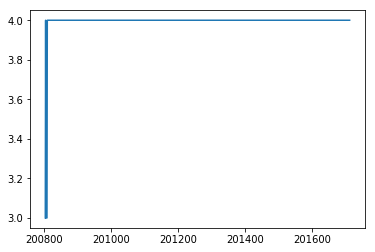

In [18]:
plt.plot(hotel["Year Month"],hotel["quality"])

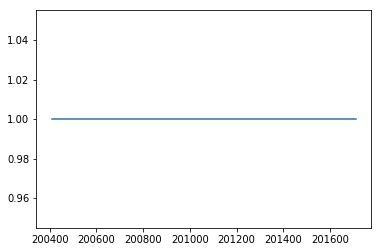

In [23]:
hotel = df[df["shareid_str"]==84776]
plt.plot(hotel["Year Month"], hotel["quality"])


Quality: Quality Improvement when using cummulative mean rating:

By month, most observations do not have quality change:

    -865 decrease
    -952 improve
    -54215 no change
    -85 changed more than 1 ladder

By quarter, most observations do not have quality change:   
  
    -1913 decrease
    -2122 improve
    -50872 no change
    -259 changed more than 1 ladder
    
By 6-month, most observations do not have quality change: 
     
     -2901 decrease
     -3278 improve
     -47053 no change
     -459 changed more than 1 ladder

By year, most observations do not have quality change: 
     
     -4061 decrease
     -4822 improve
     -41021 no change
     -821 changed more than 1 ladder   
  


Some hotels might have tried to improve quality, but did not make it because cummulative rating is hard/slow to change



3-month Quality: Quality Improvement when using 3-month moving average rating:

(not good) By month, most observations do not have quality change:

    -6913 decrease
    -7624 improve
    -41495 no change
    -2507 changed more than 1 ladder
    
    
By 3-month, most observations do not have quality change:

    -11682 decrease
    -13067 improve
    -30158 no change
    -6640 changed more than 1 ladder
    


35195: Quality != 3-month Quality
9074: 3-month Quality > Quality
26121: 3-month Quality < Quality

6-month Quality: Quality Improvement when using 6-month moving average rating:

    
By 6-month, most observations do not have quality change:

    -8831 decrease
    -12884 improve
    -31517 no change
    -4758 changed more than 1 ladder
    
34031: Quality != 6-month Quality
7246: Quality < 6-month Quality
26785: Quality > 6-month Quality

15632: 3-month Quality != 6-month Quality
7900: 3-month Quality < 6-month Quality
7732: 3-month Quality > 6-month Quality
    


In [26]:
from dateutil.relativedelta import relativedelta
from datetime import datetime

df = df[df["quality"]>0]
hotels = df.groupby("shareid_str")

l=[]
for name,hotel in hotels:
    hotel["quality_diff_m"] = hotel["quality"].diff()
    hotel["quality_diff_q"] = hotel["quality"].diff(3)
    hotel["quality_diff_6m"] = hotel["quality"].diff(6)
    hotel["quality_diff_y"] = hotel["quality"].diff(12)
    
    l.append(hotel)
    

df_2 = pd.concat(l,axis = 0)

print(sum(df_2["quality_diff_y"]<0))
print(sum(df_2["quality_diff_y"]>0))
print(sum(df_2["quality_diff_y"]==0))
print(sum(abs(df_2["quality_diff_y"])>1))


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy o

2901
3278
47053
459


In [27]:
print(sum(df_2["quality_diff_y"]<0))
print(sum(df_2["quality_diff_y"]>0))
print(sum(df_2["quality_diff_y"]==0))
print(sum(abs(df_2["quality_diff_y"])>1))

4061
4822
41021
821


In [3]:
#### How many hotels improved quality in a quarter/year?
#### How many hotels decreased quality in a quarter/year?
from dateutil.relativedelta import relativedelta
from datetime import datetime

hotels = df.groupby("shareid_str")

l=[]
for name, hotel in hotels:
    hotel["3m_rating"] = pd.rolling_mean(hotel["month_rating_mean"], 3)
    l.append(hotel)

df_2 = pd.concat(l,axis = 0)

def quality_var(df):
    df["3m_quality"] = 0
    mask = (df["3m_rating"] > 0) & (df["3m_rating"] < 3.25)
    df.loc[mask, '3m_quality'] = 1
    mask = (df["3m_rating"] >=3.25) & (df["3m_rating"] < 3.75)
    df.loc[mask, '3m_quality'] = 2
    mask = (df["3m_rating"]>=3.75) & (df["3m_rating"] < 4.25)
    df.loc[mask, '3m_quality'] = 3
    mask = (df["3m_rating"]>=4.25) 
    df.loc[mask, '3m_quality'] = 4
    return df
df_2 = quality_var(df_2)

#hotels = df_2.groupby("shareid_str")
#l=[]
#for name,hotel in hotels:
    #hotel["quality_diff_3m"] = hotel["3m_quality"].diff(3)
    #l.append(hotel)
    

#df_2 = pd.concat(l,axis = 0)

#print(sum(df_2["quality_diff_3m"]<0))
#print(sum(df_2["quality_diff_3m"]>0))
#print(sum(df_2["quality_diff_3m"]==0))
#print(sum(abs(df_2["quality_diff_3m"])>1))


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=3).mean()
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

12073
14058
58360
6759


In [30]:
print(sum(df_2["3m_quality"]!=df_2["quality"]))
print(sum(df_2["3m_quality"]>df_2["quality"]))
print(sum(df_2["3m_quality"]<df_2["quality"]))

35195
9074
26121


In [4]:
hotels = df_2.groupby("shareid_str")

l=[]
for name, hotel in hotels:
    hotel["6m_rating"] = pd.rolling_mean(hotel["month_rating_mean"], 6)
    l.append(hotel)

df_2 = pd.concat(l,axis = 0)

def quality_var(df):
    df["6m_quality"] = 0
    mask = (df["6m_rating"] > 0) & (df["6m_rating"] < 3.25)
    df.loc[mask, '6m_quality'] = 1
    mask = (df["6m_rating"] >=3.25) & (df["6m_rating"] < 3.75)
    df.loc[mask, '6m_quality'] = 2
    mask = (df["6m_rating"]>=3.75) & (df["6m_rating"] < 4.25)
    df.loc[mask, '6m_quality'] = 3
    mask = (df["6m_rating"]>=4.25) 
    df.loc[mask, '6m_quality'] = 4
    return df
df_2 = quality_var(df_2)

#hotels = df_2.groupby("shareid_str")
#l=[]
#for name,hotel in hotels:
    #hotel["quality_diff_6m"] = hotel["6m_quality"].diff(6)
    #l.append(hotel)
    

#df_2 = pd.concat(l,axis = 0)

#print(sum(df_2["quality_diff_6m"]<0))
#print(sum(df_2["quality_diff_6m"]>0))
#print(sum(df_2["quality_diff_6m"]==0))
#print(sum(abs(df_2["quality_diff_6m"])>1))


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=6).mean()
  """
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [33]:
print(sum(df_2["6m_quality"]!=df_2["quality"]))
print(sum(df_2["6m_quality"]>df_2["quality"]))
print(sum(df_2["6m_quality"]<df_2["quality"]))
print('-----')
print(sum(df_2["6m_quality"]!=df_2["3m_quality"]))
print(sum(df_2["6m_quality"]>df_2["3m_quality"]))
print(sum(df_2["6m_quality"]<df_2["3m_quality"]))

34031
7246
26785
-----
15632
7900
7732


In [37]:
fig = plt.figure(figsize = (500,400))
quality = df_2.groupby(['Year Month','3m_quality'])["shareid_str"].nunique()
plot_quality = quality.unstack('3m_quality')
plot_quality.scatter()
plt.xticks(np.arange(200000,201800,60), rotation = 75)
#df['quality'].hist(by=df['year'])
#plt.subplots_adjust(wspace=3, hspace=5)
#plot_df = quality.unstack('quality').loc[:,]


AttributeError: 'DataFrame' object has no attribute 'scatter'

<Figure size 36000x28800 with 0 Axes>

In [7]:
df_2.to_csv("/users/juju/downloads/quality_measure.csv")

In [ ]:
from sklearn.linear_model import LogisticRegression

X = np.array(df_2[''])